In [9]:
from models.lotsOfMeans import LotsOfMeans as Model # выбор модели
from dataLoader import load_test_as_dict, load_train, load_test
from processor import Processor
from constants import COLORS
from utils import plot_trained
from evaluater import Evaluater

In [10]:
train = load_train()[0]
test = load_test_as_dict()

100%|██████████| 11/11 [00:01<00:00,  6.47it/s]


In [11]:
p = Processor(when_grey_std=30)
model = Model(COLORS, p, max_depth=4, min_ratio=0.3)
model.fit(train)

100%|██████████| 11/11 [00:06<00:00,  1.64it/s]


In [12]:
test_preds = model.predictForDict(test, 1)

100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


In [13]:
ev = Evaluater(test_preds)
ev.reportClasses()

,recall,precision,f1Score,count
Violet,0.743902,0.968254,0.841379,82
White,0.106667,0.207792,0.140969,150
Orange,0.670370,0.834101,0.743326,270
Grey,0.079208,0.205128,0.114286,101
Green,0.240000,0.750000,0.363636,125
Brown,0.250000,0.103261,0.146154,76
Black,0.402685,0.284360,0.333333,149
Cyan,0.705882,0.434783,0.538117,85
Blue,0.813953,0.608696,0.696517,86
Yellow,0.596154,0.588608,0.592357,156


In [14]:
ev.reportCommon()

,recall,precision,f1ScoreMicro,f1ScoreMacro
all_classes,0.516713,0.555278,0.511854,0.535302


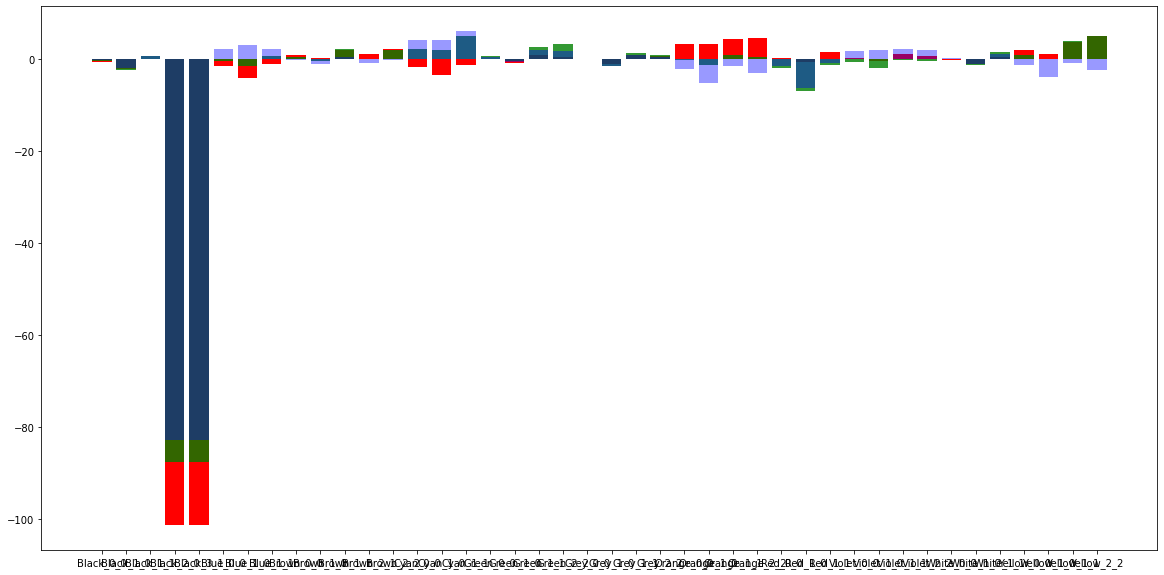

In [15]:
plot_trained(model.means)

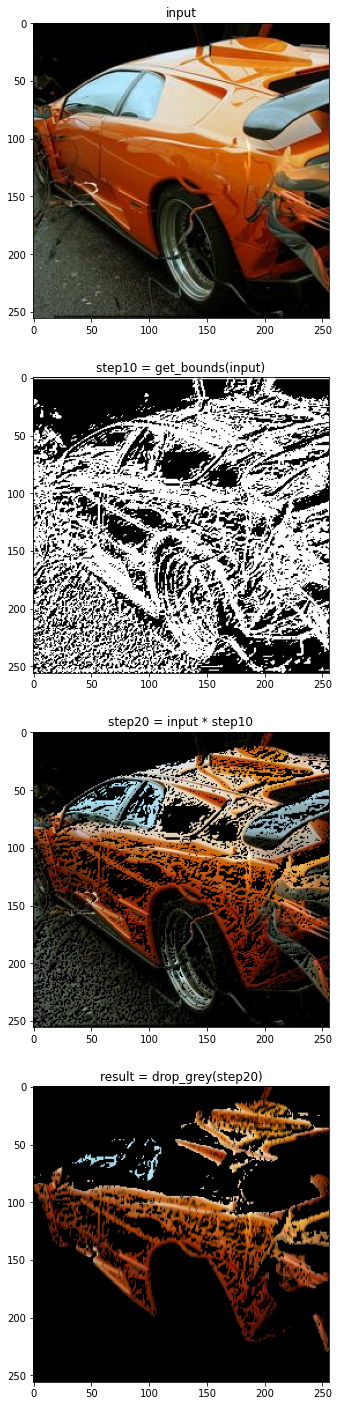

{'Orange': 0.9929699337166992}

In [19]:
model.predictOne(train['Orange'][9], top=1, logging=True)

In [20]:
predicts = model(load_test()[0], 1)

In [21]:
import pandas as pd
pd.Series([pr[0] for pr in predicts]).to_csv('deepModel2.csv', index=False, header=False)